In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [2]:
from games.goofspiel import build_goofspiel_tree, TieSolver
from data_structures.cfr_trees import CFRTree
from cfr_code.sample_cfr import SolveWithSampleCFR
from cfr_code.reconstruction_cfr import SolveWithReconstructionCFR
from cfr_code.cfr import SolveWithCFR
from utilities.graphs import graphs_from_cfr_results, epsilon_graph, comparative_epsilon_graph

In [3]:
%load_ext autoreload
%autoreload 2

In [21]:
goofspiel_tree = build_goofspiel_tree(3, 3, TieSolver.CyclicUtility)

In [22]:
goofspiel_tree.node_count

2509

In [23]:
res = []
print("--------------- RCFR ---------------")
ct = CFRTree(goofspiel_tree)
res.append(SolveWithReconstructionCFR(ct, iterations = 500, reconstructEveryIteration = 5,
                                 reconstructWithOptimalPlan = False, checkEveryIteration = 5,
                                 show_perc = True))
print("--------------- SCFR ---------------")
ct = CFRTree(goofspiel_tree)
res.append(SolveWithSampleCFR(ct, iterations = 500, checkEveryIteration = 5, show_perc = True))
print("--------------- CFR ---------------")
ct = CFRTree(goofspiel_tree)
res.append(SolveWithCFR(ct, iterations = 500, checkEveryIteration = 5, show_perc = True))

--------------- RCFR ---------------
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
--------------- SCFR ---------------
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
--------------- CFR ---------------
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


In [ ]:
comparative_epsilon_graph(res, delta_utility = 2, legend = ['RCFR', 'SCFR', 'CFR'], 
                          xaxis = 'iterations', ylims = (-0.001, 0.1))
comparative_epsilon_graph(res, delta_utility = 2, legend = ['RCFR', 'SCFR', 'CFR'], ylims = (0, 1.01),
                          xaxis = 'iterations', yaxis = 'social_welfare', max_social_welfare = 2)

## Cyclic utility

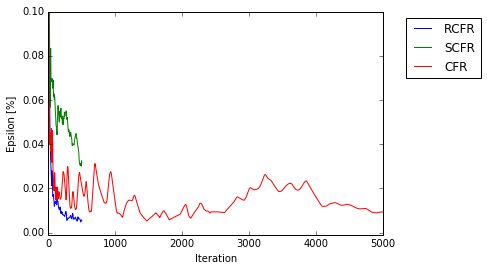

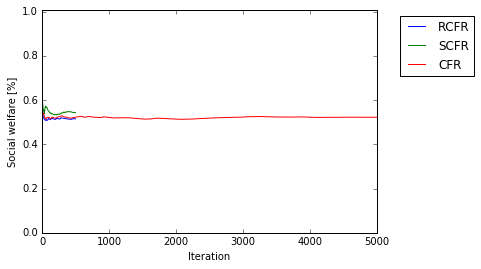

In [19]:
comparative_epsilon_graph(res, delta_utility = 2, legend = ['RCFR', 'SCFR', 'CFR'], 
                          xaxis = 'iterations', ylims = (-0.001, 0.1))
comparative_epsilon_graph(res, delta_utility = 2, legend = ['RCFR', 'SCFR', 'CFR'], ylims = (0, 1.01),
                          xaxis = 'iterations', yaxis = 'social_welfare', max_social_welfare = 2)

---

In [ ]:
res[0]['joint'].plans

In [ ]:
ct.root.buildRealizationForm(0, 1)
leaves = set()
ct.root.find_terminals(leaves)
for l in leaves:
    if  l.omega > 0:
        print((l.base_node, l.omega))

In [ ]:
ct.root.children[2].children[2].children[2].children[0].children[0].children[0].children[0].base_node

In [ ]:
print(ct.root.children[2].information_set.current_strategy)
print(ct.root.children[2].children[2].information_set.current_strategy)
print(ct.root.children[2].children[2].children[2].information_set.current_strategy)
print(ct.root.children[2].children[2].children[2].children[0].information_set.current_strategy)

In [ ]:
ct.root.children[2].children[2].children[2].children[0].information_set.nodes

In [ ]:
goofspiel_tree.display()

In [ ]:
j = ct.buildJointFromMarginals(False)

In [ ]:
len(j)

# Old


In [ ]:
goofspiel_tree = build_goofspiel_tree(3, 3, TieSolver.Accumulate)

In [ ]:
cfr_tree = CFRTree(goofspiel_tree)

In [ ]:
r = SolveWithCFR(cfr_tree, iterations = 1000, checkEveryIteration = 10, perc = 10, show_perc = True,
                 use_cfr_plus = False)

In [ ]:
epsilon_graph(r)

In [ ]:
%time res = SolveWithSampleCFR(cfr_tree, iterations = 1000, bootstrap_iterations = 0, \
                               show_perc = True, perc = 10, checkEveryIteration = 100)

In [ ]:
epsilon_graph(res)

In [ ]:
cfr_tree2 = CFRTree(goofspiel_tree)
%time res2 = SolveWithSampleCFR(cfr_tree2, iterations = 10000, bootstrap_iterations = 1000, \
                               show_perc = True, perc = 10, checkEveryIteration = 1000, bound_joint_size = False)

In [ ]:
graphs_from_cfr_results(res2)

In [ ]:
goofspiel_tree_acc = build_goofspiel_tree(3, 2, TieSolver.Accumulate)
goofspiel_tree_disc = build_goofspiel_tree(3, 2, TieSolver.DiscardAlways)

In [ ]:
goofspiel_tree_acc.display()

In [ ]:
goofspiel_tree_disc.display()